In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GOOGL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4041 rows and 7 columns


In [ ]:
print('description de la base')
print(df.describe())

description de la base
              Open         High          Low        Close    Adj Close  \
count  4041.000000  4041.000000  4041.000000  4041.000000  4041.000000   
mean    533.983149   538.995819   528.658860   533.999060   533.999060   
std     383.007917   386.590237   379.488087   383.326004   383.326004   
min      49.644646    50.920921    48.028027    50.055054    50.055054   
25%     241.211212   243.688690   238.873871   241.036041   241.036041   
50%     342.592590   345.795807   338.598602   342.177185   342.177185   
75%     791.979980   798.000000   786.200012   790.460022   790.460022   
max    1699.520020  1726.099976  1660.189941  1717.390015  1717.390015   

             Volume  
count  4.041000e+03  
mean   6.909802e+06  
std    7.895987e+06  
min    5.206000e+05  
25%    1.844600e+06  
50%    4.191600e+06  
75%    8.702600e+06  
max    8.215110e+07  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4041 non-null   object 
 1   Open       4041 non-null   float64
 2   High       4041 non-null   float64
 3   Low        4041 non-null   float64
 4   Close      4041 non-null   float64
 5   Adj Close  4041 non-null   float64
 6   Volume     4041 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 221.1+ KB


In [ ]:
print("Total missing values:", df.isna().sum().sum())

Total missing values: 0


In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

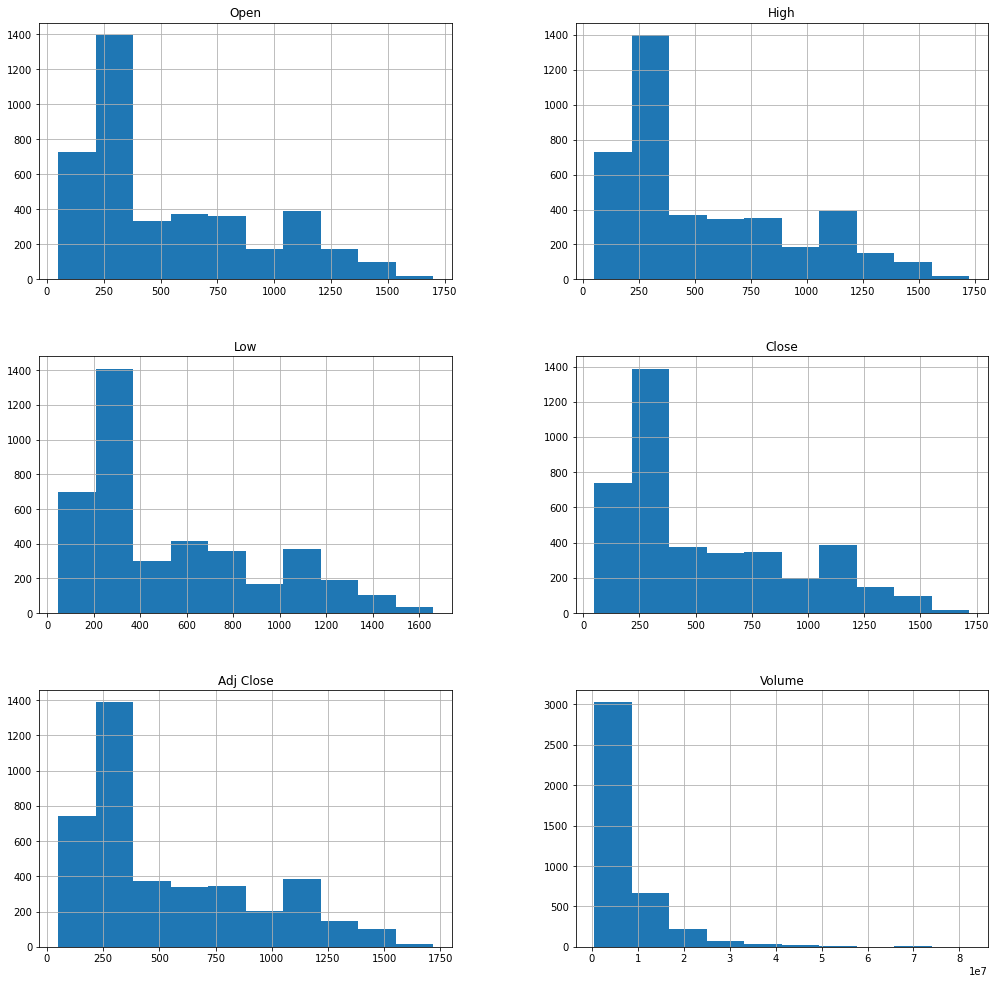

In [ ]:
df.hist (figsize = (17,17))
plt.show ()

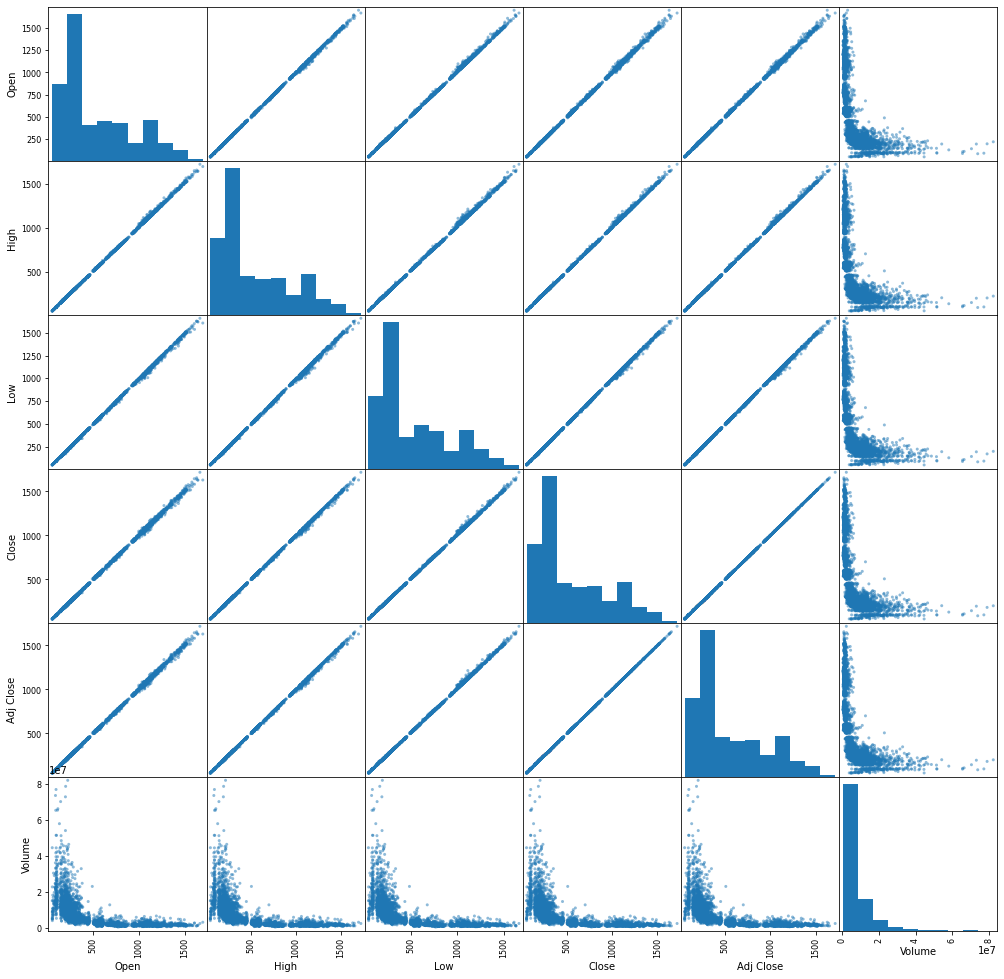

In [ ]:
pd.plotting.scatter_matrix (df, figsize = (17,17))
pyplot.show ()

In [ ]:
data_train = df[df['Date']<'2019-01-01'].copy()
data_test = df[df['Date']>='2019-01-01'].copy()
data_training=data_train.copy()

In [ ]:
data_train = data_train.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(3617, 5)
(424, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler # used for feature scaling

# feature scaling
#We use feature scaling to convert different scales
#to a standard scale to make it easier for Machine Learning algorithms.
# sc = StandardScaler()
sc = MinMaxScaler()
data_train= sc.fit_transform(data_train)
data_train

array([[3.27076291e-04, 9.36027567e-04, 0.00000000e+00, 1.33688677e-04,
        5.40709661e-01],
       [7.34916593e-04, 2.96139917e-03, 1.87022750e-03, 3.36247683e-03,
        2.73350035e-01],
       [4.66793067e-03, 4.73662548e-03, 5.39234743e-03, 3.80405377e-03,
        2.17265605e-01],
       ...,
       [7.87877956e-01, 8.08064229e-01, 7.89295551e-01, 8.11727769e-01,
        2.17957749e-02],
       [8.14744202e-01, 8.16842824e-01, 8.18102800e-01, 8.06693170e-01,
        1.46918125e-02],
       [8.13396822e-01, 8.15843250e-01, 8.10728176e-01, 8.05300884e-01,
        1.39028917e-02]])

In [ ]:
X_train = []
y_train = []

for i in range(60, data_train.shape[0]):
    X_train.append(data_train[i-60:i])
    y_train.append(data_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3557, 60, 5)
(3557,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting

In [ ]:
model1 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model1.add(SimpleRNN(units = 60,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model1.add(Dropout(0.2))
# Adding a second RNN layer and some Dropout regularisation.
model1.add(SimpleRNN(units = 60,activation='relu', return_sequences = True))
model1.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
model1.add(SimpleRNN(units = 80,activation='relu', return_sequences = True))
model1.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
model1.add(SimpleRNN(units = 120))
model1.add(Dropout(0.2))

# Adding the output layer
model1.add(Dense(units = 1))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 60)            3960      
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 60)            7260      
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 80)            11280     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 120)               2

In [ ]:
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model1.fit(X_train, y_train, epochs =50, batch_size = 32)

Epoch 1/50
112/112 [==============================] - 11s 71ms/step - loss: 0.0293
Epoch 2/50
112/112 [==============================] - 8s 70ms/step - loss: 0.0047
Epoch 3/50
112/112 [==============================] - 8s 69ms/step - loss: 0.0030
Epoch 4/50
112/112 [==============================] - 8s 69ms/step - loss: 0.0024
Epoch 5/50
112/112 [==============================] - 8s 69ms/step - loss: 0.0021
Epoch 6/50
112/112 [==============================] - 9s 84ms/step - loss: 0.0021
Epoch 7/50
112/112 [==============================] - 8s 70ms/step - loss: 0.0018
Epoch 8/50
112/112 [==============================] - 8s 70ms/step - loss: 0.0017
Epoch 9/50
112/112 [==============================] - 8s 70ms/step - loss: 0.0019
Epoch 10/50
112/112 [==============================] - 8s 71ms/step - loss: 0.0017
Epoch 11/50
112/112 [==============================] - 8s 70ms/step - loss: 0.0015
Epoch 12/50
112/112 [==============================] - 8s 70ms/step - loss: 0.0014
Epoch 13/50


In [ ]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


In [ ]:
past_60_days = data_training.tail(60)
data_test = past_60_days.append(data_test, ignore_index = True)
# Dropping 'Date' and 'Adj Close'
data_test = data_test.drop(['Date', 'Adj Close'], axis = 1)
data_test.head()

,Open,High,Low,Close,Volume
0,1205.030029,1205.900024,1163.849976,1177.069946,2328800
1,1176.000000,1182.000000,1154.319946,1167.829956,1592600
2,1160.000000,1175.859985,1135.400024,1155.920044,2309500
3,1151.310059,1161.550049,1144.170044,1145.170044,1684500
4,1136.400024,1137.020020,1091.510010,1092.160034,2949000


In [ ]:
data_test = sc.transform(data_test)
data_test

array([[0.93215681, 0.93104506, 0.91839316, 0.91223401, 0.02215103],
       [0.90873558, 0.91177891, 0.91054933, 0.90475493, 0.01313235],
       [0.8958269 , 0.90682936, 0.89497702, 0.89511475, 0.0219146 ],
       ...,
       [1.3056858 , 1.35038563, 1.32691284, 1.34958257, 0.02395551],
       [1.33110786, 1.32934607, 1.28371845, 1.2784503 , 0.03258096],
       [1.25807694, 1.27694057, 1.22631805, 1.23935503, 0.02783191]])

In [ ]:
X_test = []
y_test = []

for i in range(60, data_test.shape[0]):
    X_test.append(data_test[i-60:i])
    y_test.append(data_test[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((424, 60, 5), (424,))

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1.shape

14/14 [==============================] - 1s 17ms/step


(424, 1)

In [ ]:
sc.scale_

array([8.06792972e-04, 8.06114202e-04, 8.23064254e-04, 8.09424979e-04,
       1.22503231e-08])

In [ ]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [ ]:
y_pred1 = y_pred1*scale
y_test = y_test*scale

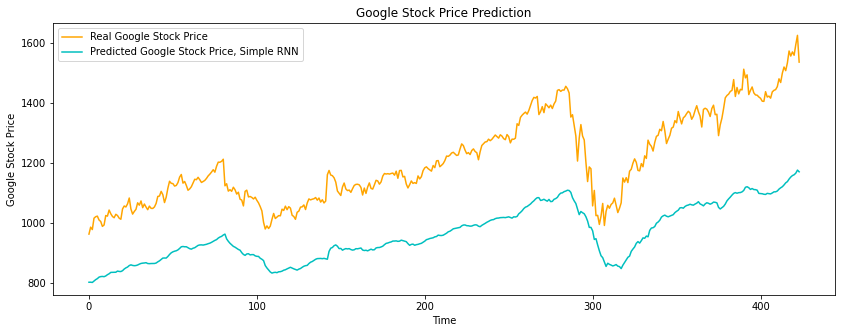

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'orange', label = 'Real Google Stock Price')
plt.plot(y_pred1, color = "c", label = 'Predicted Google Stock Price, Simple RNN')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
#Initializing the RNN
model2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model2.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model2.add(Dropout(0.2))
# Adding a second RNN layer and some Dropout regularisation.
model2.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third RNN layer and some Dropout regularisation.
model2.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth RNN layer and some Dropout regularisation.
model2.add(LSTM(units = 120, activation = 'relu'))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [ ]:
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model2.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
112/112 [==============================] - 26s 189ms/step - loss: 0.0130
Epoch 2/50
112/112 [==============================] - 21s 189ms/step - loss: 0.0020
Epoch 3/50
112/112 [==============================] - 21s 188ms/step - loss: 0.0020
Epoch 4/50
112/112 [==============================] - 21s 189ms/step - loss: 0.0018
Epoch 5/50
112/112 [==============================] - 23s 205ms/step - loss: 0.0017
Epoch 6/50
112/112 [==============================] - 21s 188ms/step - loss: 0.0015
Epoch 7/50
112/112 [==============================] - 21s 189ms/step - loss: 0.0016
Epoch 8/50
112/112 [==============================] - 21s 189ms/step - loss: 0.0016
Epoch 9/50
112/112 [==============================] - 21s 187ms/step - loss: 0.0015
Epoch 10/50
112/112 [==============================] - 21s 189ms/step - loss: 0.0015
Epoch 11/50
112/112 [==============================] - 21s 189ms/step - loss: 0.0014
Epoch 12/50
112/112 [==============================] - 21s 188ms/step - lo

In [ ]:
X_test = []
y_test = []

for i in range(60, data_test.shape[0]):
    X_test.append(data_test[i-60:i])
    y_test.append(data_test[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((424, 60, 5), (424,))

In [ ]:
#predictions
y_pred2 = model2.predict(X_test)
y_pred2.shape

14/14 [==============================] - 1s 56ms/step


(424, 1)

In [ ]:
sc.scale_

array([8.06792972e-04, 8.06114202e-04, 8.23064254e-04, 8.09424979e-04,
       1.22503231e-08])

In [ ]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [ ]:
y_pred2 = y_pred2*scale
y_test = y_test*scale

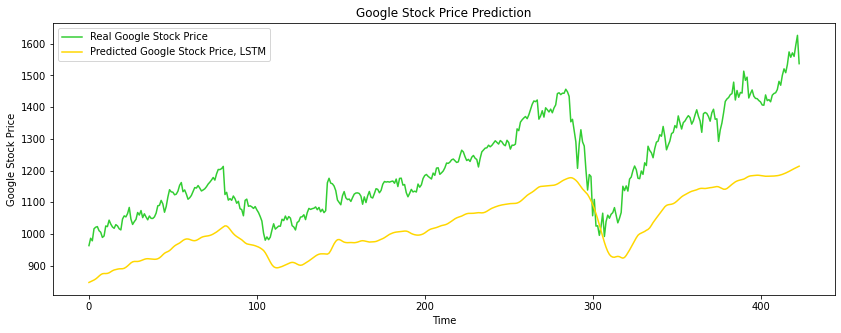

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'LimeGreen', label = 'Real Google Stock Price')
plt.plot(y_pred2, color = 'Gold', label = 'Predicted Google Stock Price, LSTM')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

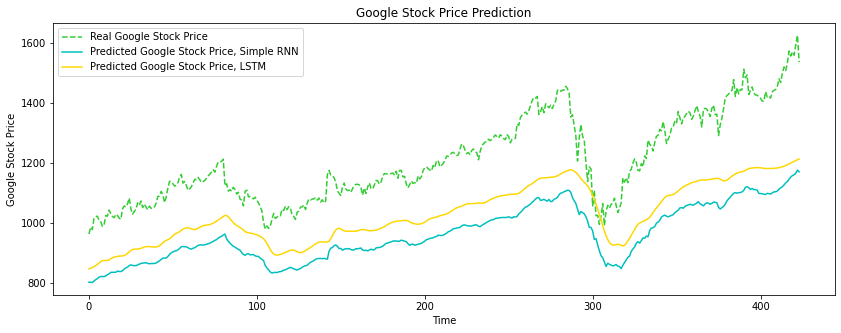

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'LimeGreen',linestyle='dashed', label = 'Real Google Stock Price')
plt.plot(y_pred1, color = 'c', label = 'Predicted Google Stock Price, Simple RNN')
plt.plot(y_pred2, color = 'Gold', label = 'Predicted Google Stock Price, LSTM')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()